# plotting av test



## import libraries


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

## load files

In [ ]:
# --- AD2 data paths---
point_five_ohm_decouple = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/0,5ohm_30uF_decouple_AD2.csv'
point_five_ohm = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/0.5ohm_AD2.csv'
one_ohm_decouple = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/1ohm_30uF_decouple_AD2.csv'
one_ohm = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/1ohm_AD2.csv'
ten_ohm_decouple = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/10ohm_30uF_decouple_AD2.csv'
ten_ohm = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/10ohm_AD2.csv'
hundered_ohm_decouple = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/100ohm_30F_decouple_AD2.csv'
hundered_ohm = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype/100ohm_AD2.csv'


# Load the CSV file
data_point_five_d = pd.read_csv(point_five_ohm_decouple, names=['Time', 'Voltage'])
data_point_five = pd.read_csv(point_five_ohm, names=['Time', 'Voltage'])
data_one_d = pd.read_csv(one_ohm_decouple, names=['Time', 'Voltage'])
data_one = pd.read_csv(one_ohm, names=['Time', 'Voltage'])
data_ten_d = pd.read_csv(ten_ohm_decouple, names=['Time', 'Voltage'])
data_ten = pd.read_csv(ten_ohm, names=['Time', 'Voltage'])
data_hundered_d = pd.read_csv(hundered_ohm_decouple, names=['Time', 'Voltage'])
data_hundered = pd.read_csv(hundered_ohm, names=['Time', 'Voltage'])

## plot

Available CSV files:
[0] 0,5ohm_30uF_decouple_AD2.csv
[1] 100ohm_30F_decouple_AD2.csv
[2] 1ohm_30uF_decouple_AD2.csv
[3] 0.5ohm_AD2.csv
[4] 10ohm_30uF_decouple_AD2.csv
[5] 1ohm_AD2.csv
[6] 100ohm_AD2.csv
[7] 10ohm_AD2.csv

Selected file: 10ohm_30uF_decouple_AD2.csv
Nominal (mean) voltage: 1.012 V
Peak-to-peak voltage: 0.050 V


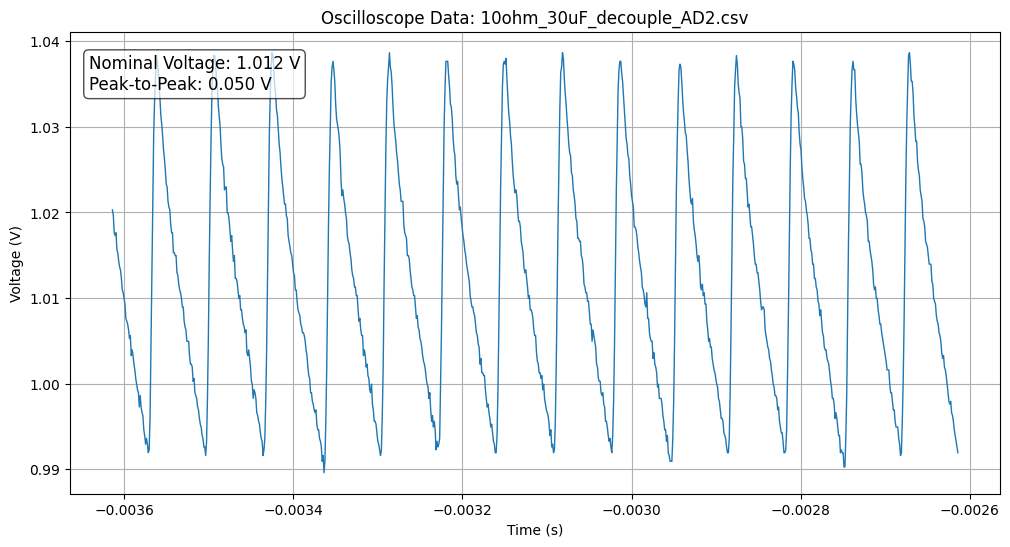

In [18]:
# --- Set your folder path here ---
folder_path = '/Users/aslakoverengiveland/Dataplotting/data_siste_prototype'

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Check if any files were found
if not csv_files:
    print("No CSV files found in the specified folder.")
    exit()

# Let user pick which file to plot
print("Available CSV files:")
for idx, file in enumerate(csv_files):
    print(f"[{idx}] {os.path.basename(file)}")

file_index = int(input("Enter the number of the file you want to plot: "))
file_path = csv_files[file_index]

# Load the selected CSV
data = pd.read_csv(file_path, names=['Time', 'Voltage'])

# Calculate statistics
nominal_voltage = data['Voltage'].mean()
peak_to_peak_voltage = data['Voltage'].max() - data['Voltage'].min()

# Print statistics to console
print(f"\nSelected file: {os.path.basename(file_path)}")
print(f"Nominal (mean) voltage: {nominal_voltage:.3f} V")
print(f"Peak-to-peak voltage: {peak_to_peak_voltage:.3f} V")

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 6))

# Plot only part of the signal to zoom automatically
time_window = 0.001  # 10ms window
time_start = data['Time'].min()
time_end = time_start + time_window

# Mask to plot only part of the data
mask = (data['Time'] >= time_start) & (data['Time'] <= time_end)
ax.plot(data['Time'][mask], data['Voltage'][mask], lw=1)

# Labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.set_title(f'Oscilloscope Data: {os.path.basename(file_path)}')
ax.grid(True)

# Show the statistics inside the plot
stats_text = (f"Nominal Voltage: {nominal_voltage:.3f} V\n"
              f"Peak-to-Peak: {peak_to_peak_voltage:.3f} V")
ax.text(0.02, 0.95, stats_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.show()

# plotting av simulering
